In [6]:
from segpy.reader import create_reader
import report as util
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#2-D Rev 1 Data
filename = "traces.sgy"

def get_max_amplitude(data, perc=100):
    sorted_array = np.sort(np.abs(data), axis=None)
    tam = len(sorted_array)
    index = round((perc/100)*tam)
    max_amplitude = sorted_array[index - 1]
    return max_amplitude

def scaled_data(data, max_amplitude, dx):
    #Correcting amplitudes for all data
    new_data = []
    #scale = dx/max_amplitude
    scale = 0.05
    print(scale)
    for trace in data:    
        corrected_data = np.array([x  if abs(x) <= max_amplitude else max_amplitude*np.sign(x) for x in trace])
        new_data.append(scale*corrected_data)
        
    return new_data

#Opening Tape
with open(filename, 'rb') as file:
    segy_reader = create_reader(file)    
    #Sample interval (microseconds) between samples in a trace for all traces
    interval = segy_reader._binary_reel_header.sample_interval*pow(10,-6)
    #Number of samples for all traces
    nsamples = segy_reader._binary_reel_header.num_samples
    #Traces data
    all_data = []
    #Center of oscillatory data for each trace
    all_offset = []
    
    #Reading Traces for first tape CDP
    cdp = segy_reader.trace_header(0).ensemble_num
    aux = cdp
    for trace_index in segy_reader.trace_indexes():         
        if(aux !=  cdp):
            break
        aux = segy_reader.trace_header(trace_index).ensemble_num
        #X-axis
        all_offset.append(segy_reader.trace_header(trace_index).source_receiver_offset)
        all_data.append(np.array(segy_reader.trace_samples(trace_index)))
        

In [31]:
plt.close() 
#Offset distance between traces
dx = 50        
#Scaling data
max_amplitude = get_max_amplitude(all_data, perc=90)
new_all_data = scaled_data(all_data, max_amplitude, dx)

0.05


Populating the interactive namespace from numpy and matplotlib


/home/abd/anaconda2/envs/py36-test/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['trace']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


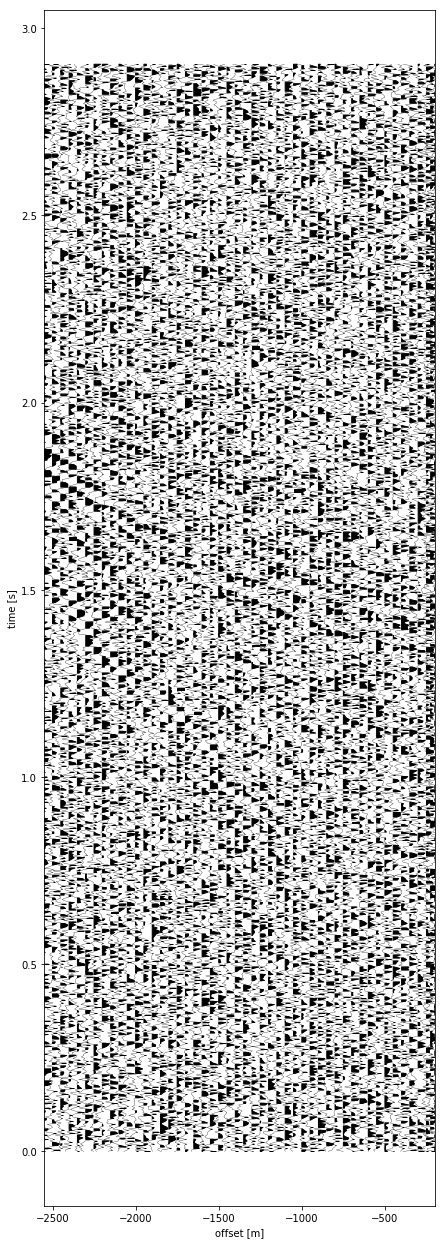

In [32]:
#Now plot!
#avo: amplitude versus offset visualization
%pylab inline
pylab.rcParams['figure.figsize'] = (7,22)
#pylab.rcParams['figure.figsize'] = (14,10)

time_vec = np.linspace(0, nsamples*interval, nsamples)
y = time_vec
for i in range(0, len(all_offset)):
    offset = all_offset[i]
    trace = new_all_data[i]
    x = trace + offset        
    plt.plot(x, y, 'k-', linewidth=0.3)
    #Paint black all positive amplitudes
    plt.fill_betweenx(list(y),offset,list(x), where = x >= offset, color='black')
    
        
    
plt.xlim([min(all_offset),max(all_offset)])
plt.xlabel('offset [m]')
plt.ylabel('time [s]')
plt.show()
       

In [332]:


#plt.close()
#Y-axis
#Now plot!


        

plt.show()


In [299]:
# # len([[dist+samples] for dist in all_offset for samples in new_all_data])
# # #len(new_all_data)
# plt.plot(new_all_data[0] + abs(all_offset[0]), time_vec,'k-')
# plt.close()

len(all_offset)

49